# 아마존 세일즈 데이터 EDA - Review를 중심으로

In [43]:
# Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
from tqdm import tqdm_notebook
warnings.simplefilter(action='ignore')
%matplotlib inline

In [44]:
# Load the dataset (CSV File)
df = pd.read_csv('../../data/amazon.csv', encoding='utf-8')
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [46]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### 데이터셋 확인 결과
* 총 16개의 열과 1465개의 행으로 이루어져 있음.
* 현재 모든 데이터 타입이 object으로 구성되어져 있음.
* 'rating_count' 컬럼에서 2개의 null값이 발견됨. 해당 컬럼은 특성 상 0이거나 양의 자연수 값을 가져야 함.

### 확인 후 수정사항
* 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count' 는 float 타입으로 변경
* rating_count 값 확인 후 len(rating)으로 변경하거나, 아무런 리뷰가 없을 경우 0으로 바꾸기.
* 현재 price 표기는 '₹'(인도 루피)로 되어 있어, 해석상의 편의를 위해 원화로 변경할 수 있어보임.

## (1) 데이터 타입 변경하기

In [47]:
def clean_price(price):
    return price.str.replace('₹', '').str.replace(',', '').astype('float64')

def clean_percentage(percentage):
    return percentage.str.rstrip('%').astype('float64') / 100

# Cleaning price columns
for col in ['discounted_price', 'actual_price']:
    df[col] = clean_price(df[col])

# Cleaning discount percentage
df['discount_percentage'] = clean_percentage(df['discount_percentage'])

#### 문제점 1. 별점 중 숫자로 변경할 수 없는 문자 '|'가 섞임.

In [48]:
# Finding unusual string in rating column
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [49]:
# Check the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


#### 문제점 1의 해결. 아마존 인도 웹사이트에서 해당 제품 ID를 기반으로 별점 직접 확인
- 제품 ID: B08L12N5H1
- 관련 웹사이트: https://www.amazon.in/dp/B08L12N5H1
- 별점 수정사항 '|' --> '3.9'

한계: 데이터셋이 저장된 2022년 기준이 아닌, 2024년 기준 별점 데이터값 확인

In [50]:
# Changing Rating Columns Data Type
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [51]:
# Change Rating Count Columns Data Type
df['rating_count'] = clean_price(df['rating_count'])
df['rating_count'].head(5)

0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64

#### 문제점 2. Rating Count의 Null 값 존재
- 관련 웹사이트 1: https://www.amazon.in/dp/B0B94JPY2N
- 관련 웹사이트 2: https://www.amazon.in/dp/B0BQRJ3C47 (접근 불가)

2024년 기준 B0B94JPY2N의 별점 개수(rating count)는 58개, B0BQRJ3C47는 현재 판매 중지된 상품이다.

아래의 두가지 옵션 중, 해당 칼럼의 중요성을 고려했을 때, 옵션 1로 진행하는 것이 타당해보임.
- 옵션 1. 해당 null 값 데이터 칼럼 삭제
- 옵션 2. 임의의 값 넣기 (0, median 값, 혹은 임의의 랜덤 값)
    - df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

#### 데이터 삭제/수정은 현재 단계에서 진행하지 않기로 함

In [52]:
# Check the null row
df_null = df.query('rating_count.isnull()')
df_null

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [53]:
# 데이터셋 내 중복되는 값이 있는지 확인
# 만약 있다면 df.drop_duplicates(keep='last')
df.duplicated().any()

False

## (2) 데이터 간 상관관계 파악하기

In [54]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = [
    'product_id', 'category', 'review_id', 'review_content', 'product_name',
    'user_name', 'about_product', 'user_id', 'review_title', 'img_link', 'product_link'
]

# Dictionary to store LabelEncoder objects
label_encoders = {}

# Encode
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [55]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,399.0,1099.0,0.64,4.2,24269.0,474,623,522,817,881,604,1118,1308
1,848,134,10,199.0,349.0,0.43,4.0,43994.0,279,88,207,1025,7,413,1248,157
2,819,1023,10,199.0,1899.0,0.90,3.9,7928.0,1250,849,482,827,422,674,876,1160
3,643,1264,10,329.0,699.0,0.53,4.2,94363.0,1010,254,614,786,376,269,518,380
4,588,829,10,154.0,399.0,0.61,4.2,16905.0,1189,17,1139,114,44,120,1209,919


<Figure size 2000x1600 with 0 Axes>

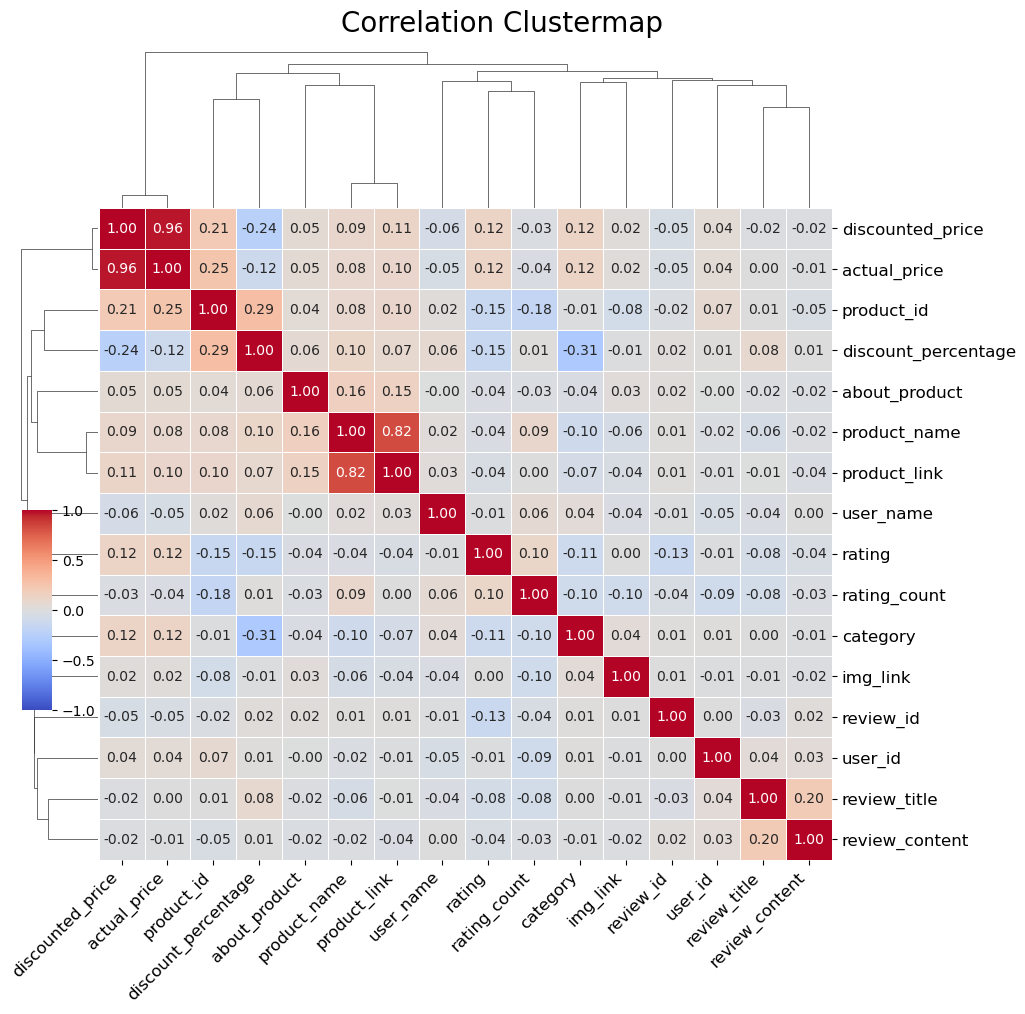

In [56]:
df_corr = df.corr()

plt.figure(figsize=(20, 16))  # Increased figure size
clustermap = sns.clustermap(df_corr, 
                            cmap='coolwarm',
                            vmin=-1, vmax=1, center=0,
                            annot=True, fmt='.2f',
                            linewidths=0.5,
                            cbar_kws={"shrink": .6},  # Slightly larger colorbar
                            annot_kws={"size": 10},  # Increased annotation size
                            dendrogram_ratio=(.1, .2),
                            cbar_pos=(0.02, .32, .03, .2))

# Rotate x-axis labels and increase font size
plt.setp(clustermap.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(clustermap.ax_heatmap.get_yticklabels(), fontsize=12)

# Adjust the layout to prevent clipping of labels
# plt.tight_layout()

# Add a title
plt.suptitle('Correlation Clustermap', fontsize=20, y=1.02)

plt.show()

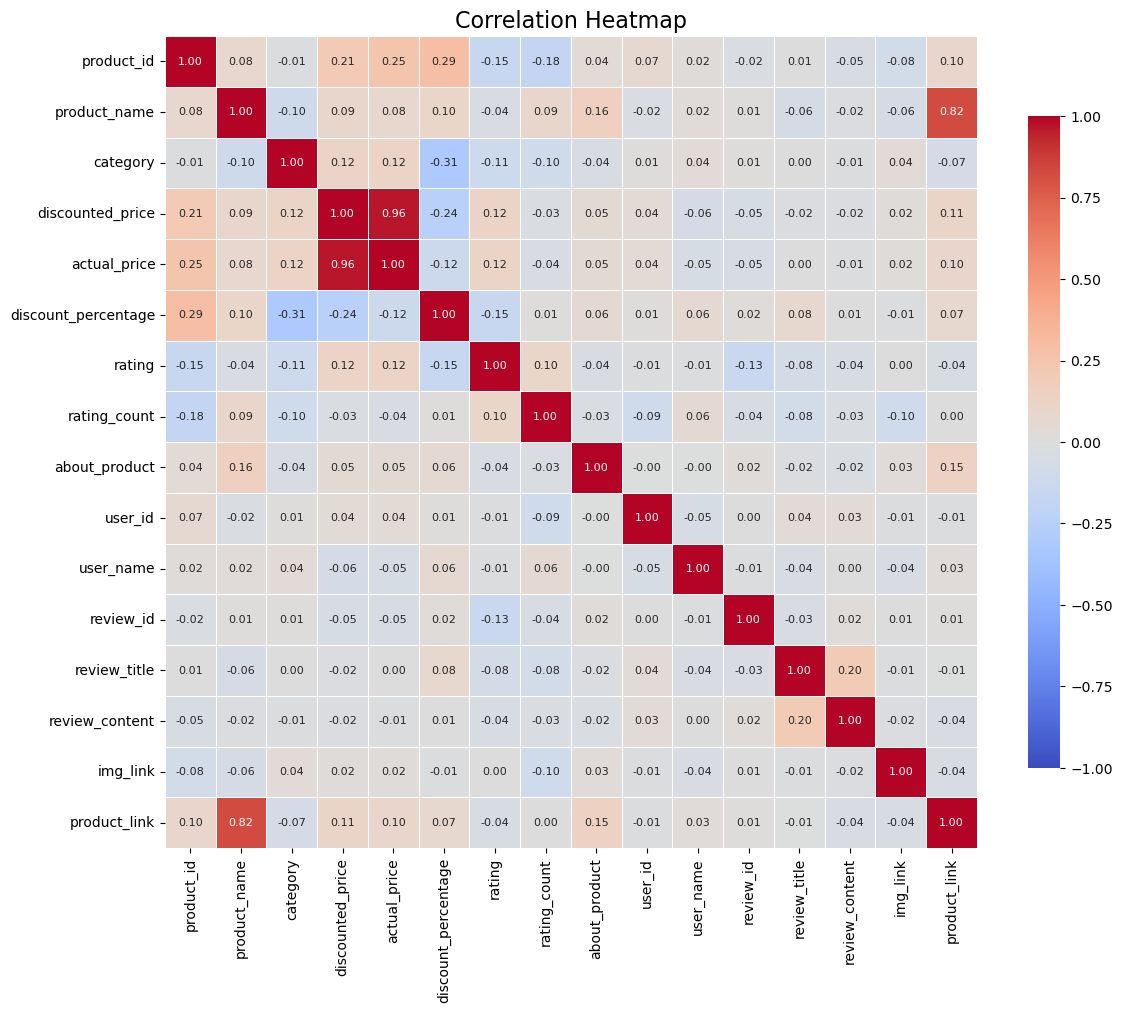

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8},
            fmt='.2f',
            annot_kws={"size": 8})

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

### Key Takeaways
* 제품 전반에 걸쳐 가격 책정 전략이 일관성 있게 적용되며, 할인도 균일하게 적용되는 것으로 보임.
'discount_percentage'는 'product_id'와 다소 긍정적인 연관성 (0.29)을 보임.
* 'category'가 할인 전략에 영향을 미칠 수 있음. 
'category'와 'discount_percentage'간의 연관성이 엿보임 (-0.31)
* 'user_id'/'user_name'과 다른 변수들과의 연관성은 크게 보이지 않음.
* 'actual_price'/'discounted_price' 와 'rating' 간의 미약한 연관성 (0.12)이 엿보임.
이는, 가격이 높을 수록 별점이 더 높아지는 경향이 약하게나마 존재한다는 뜻임.
* 'about_product'는 다른 변수들과 미약한 연관성을 보여서, 제품 설명이 가격이나 별점에 강하게 영향을 주지 않을 수 있음을 시사함.

In [58]:
# Decode (inverse transform)
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col])

In [59]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## (3) 리뷰 분석하기

In [99]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/yoorichoi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yoorichoi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yoorichoi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [100]:
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# NLTK setup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# WordCloud setup
try:
    from wordcloud import WordCloud
    wordcloud_available = True
except ImportError:
    print("WordCloud not available. Skipping word cloud generation.")
    wordcloud_available = False

In [101]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [91]:
# 1. Basic statistics
df['review_content'].describe()

count                                                  1465
unique                                                 1212
top       I am not big on camera usage, personally. I wa...
freq                                                      8
Name: review_content, dtype: object

In [88]:
# Convert review_content to string and handle NaN values
df['review_content'] = df['review_content'].fillna('').astype(str)

In [93]:
df['review_content'].head()

0    Looks durable Charging is fine tooNo complains...
1    I ordered this cable to connect my phone to An...
2    Not quite durable and sturdy,https://m.media-a...
3    Good product,long wire,Charges good,Nice,I bou...
4    Bought this instead of original apple, does th...
Name: review_content, dtype: object

In [94]:
import re

def is_text(s):
    # Check if the entry is a string and contains at least one letter
    return isinstance(s, str) and bool(re.search('[a-zA-Z]', s))

# Apply the is_text function to each entry in the review_content column
df['is_text'] = df['review_content'].apply(is_text)

# Find non-text entries
non_text_entries = df[~df['is_text']]

print(f"Number of non-text entries: {len(non_text_entries)}")

if len(non_text_entries) > 0:
    print("\nSample of non-text entries:")
    print(non_text_entries['review_content'].head())
    
    print("\nValue counts of non-text entries:")
    print(non_text_entries['review_content'].value_counts().head())
    
    print("\nData types of non-text entries:")
    print(non_text_entries['review_content'].apply(type).value_counts())
else:
    print("All entries appear to be text.")

# # Optional: Remove non-text entries
# df_cleaned = df[df['is_text']].copy()
# df_cleaned.drop('is_text', axis=1, inplace=True)

# print(f"\nOriginal dataset shape: {df.shape}")
# print(f"Cleaned dataset shape: {df_cleaned.shape}")


Number of non-text entries: 0
All entries appear to be text.


In [96]:
# Check for empty strings or whitespace-only entries
empty_entries = df[df['review_content'].str.strip() == '']
print(f"\nNumber of empty or whitespace-only entries: {len(empty_entries)}")

if len(empty_entries) > 0:
    print("\nSample of empty entries:")
    print(empty_entries['review_content'].head())

# # Optional: Remove empty entries
# df_final = df_cleaned[df_cleaned['review_content'].str.strip() != ''].copy()

# print(f"\nFinal dataset shape after removing empty entries: {df_final.shape}")


Number of empty or whitespace-only entries: 0


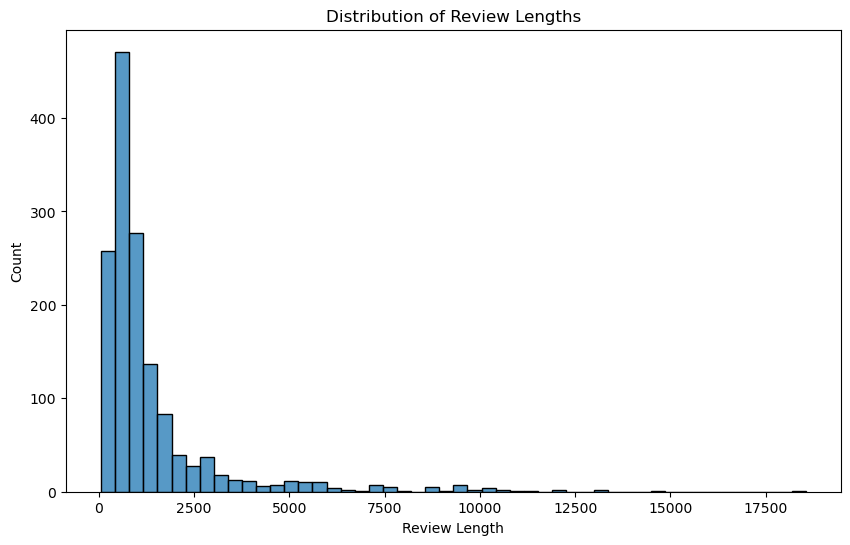

In [68]:
# 2. Review length analysis
df['review_length'] = df['review_content'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()

In [97]:
# 3. Word frequency analysis
def get_top_words(text_series, top_n=20):
    stop_words = set(stopwords.words('english'))
    words = []
    for review in text_series:
        if isinstance(review, str):  # Extra check to ensure we're dealing with strings
            tokens = word_tokenize(review.lower())
            words.extend([word for word in tokens if word.isalnum() and word not in stop_words])
    return Counter(words).most_common(top_n)

In [102]:
# Word frequency analysis
top_words = get_top_words(df['review_content'])

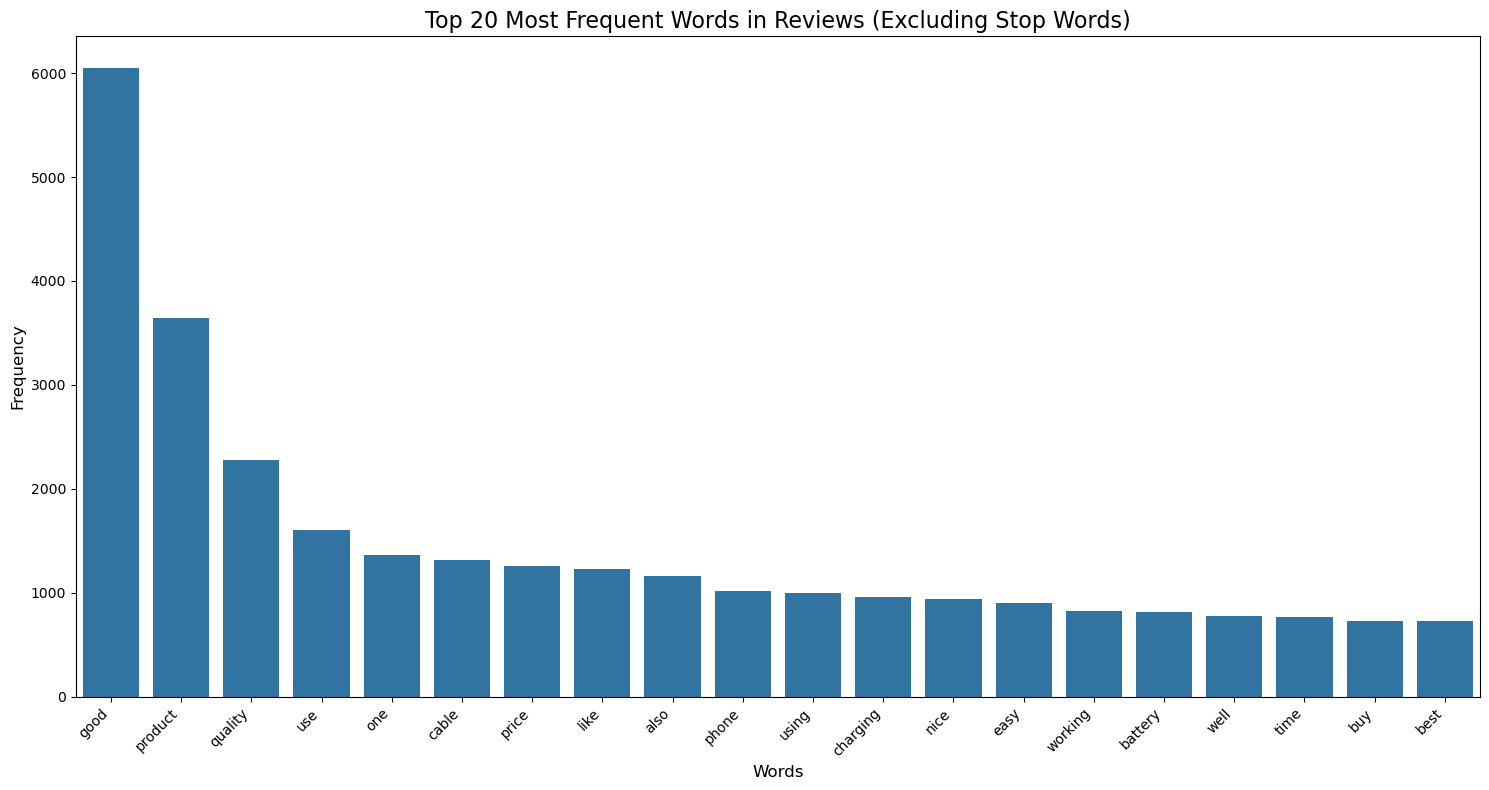

In [103]:
# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 20 Most Frequent Words in Reviews (Excluding Stop Words)', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

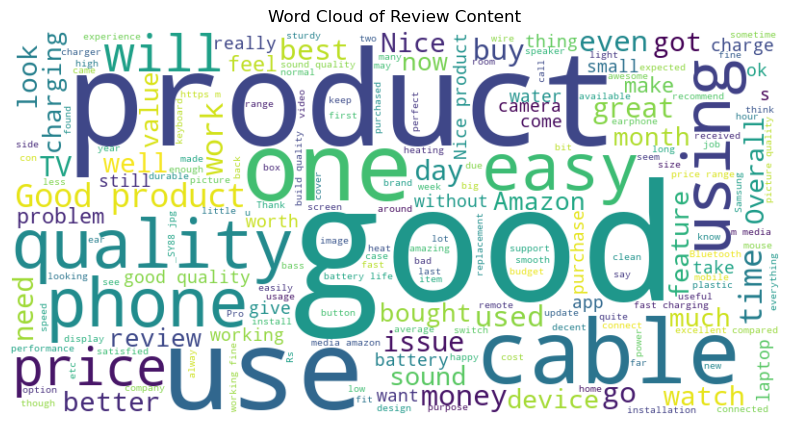

In [104]:
# 4. Word cloud
text = ' '.join(df['review_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content')
plt.show()

#### TextBlob을 활용한 감성분석
- 참고 블로그 1: https://pej2834.tistory.com/17
    - AFINN, VADER 등 다른 감성 사전을 기반으로 한 분석 기법도 시도해 볼 가치가 있어보임
    - 시간이 되면 주관도(subjectivity)와 해당 감정 분석의 정확도도 산출하기

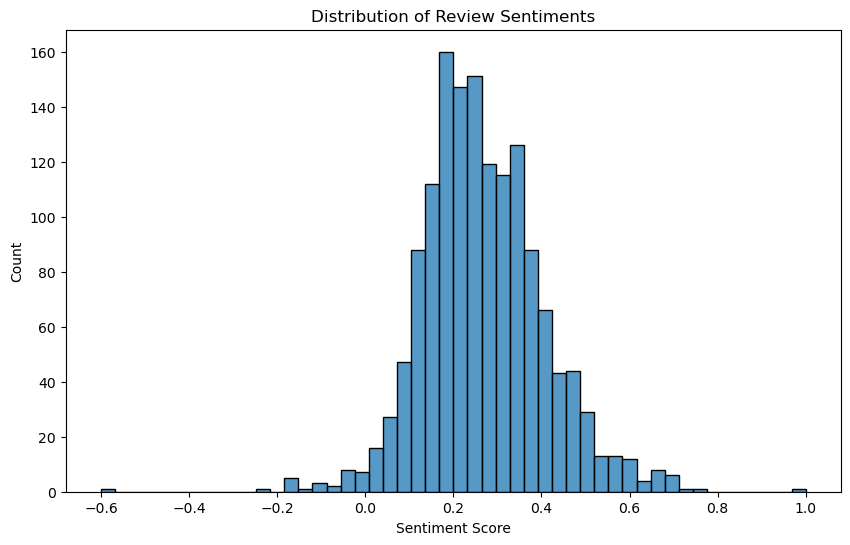

In [105]:
# 5. Sentiment analysis
df['sentiment'] = df['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Score')
plt.show()

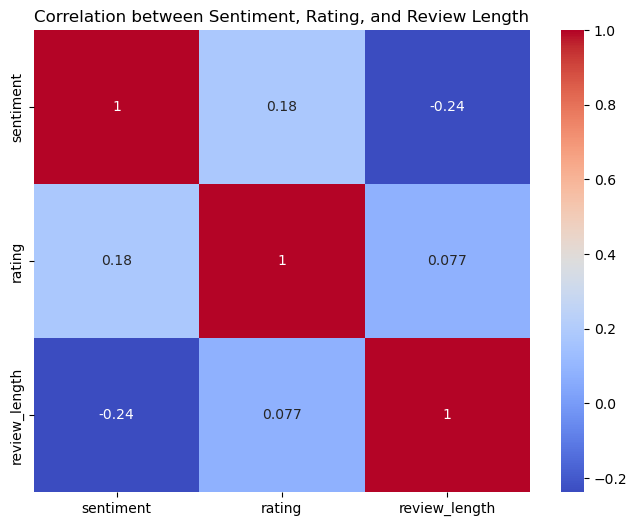

In [106]:
# 6. Correlation of sentiment with other variables
correlation = df[['sentiment', 'rating', 'review_length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sentiment, Rating, and Review Length')
plt.show()

## (4) Topic Modeling

In [ ]:
#This is the test line